## About Dataset  
This study seeks to investigate real estate prices in Newark for the year 2023. To achieve this, I utilize the "Housing Price & Real Estate - 2023" dataset. The dataset encompassing eight key variables: Address, Price, Description, Place, Beds, Bath, Sq.Ft, and Website

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset
homes = pd.read_excel('Home_Sales.xlsx')

In [5]:
# view the first 5 and last 5 of the dataset and the shape
homes

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles
...,...,...,...,...,...,...,...,...
3355,203 17 Ave NE,799000,CA AB T2E 1L9,Tuxedo Park,3,2.0,869,RE/MAX Real Estate (Central)
3356,4111 162 Ave SW,8000000,CA AB T2Y 0N7,NaN,5,4.5,9031,Diamond Realty & Associates Ltd.
3357,289 Sage Hill Circle NW,595000,CA AB T3R 1V2,Sage Hill,3,2.5,1733,RE/MAX House Of Real Estate
3358,738 1 Ave SW #1307,7988000,CA AB T2P 5G8,Eau Claire,2,2.5,3544,RE/MAX Real Estate (Central)


In [ ]:
#We have 3360 rows and 8 columns of data

In [6]:
# get the dataset info
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Address      3360 non-null   object 
 1   Price        3360 non-null   int64  
 2   Description  3360 non-null   object 
 3   Place        3344 non-null   object 
 4   Beds         3360 non-null   int64  
 5   Bath         3360 non-null   float64
 6   Sq.Ft        3360 non-null   int64  
 7   Website      3359 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 210.1+ KB


In [8]:
# check the missing values row
homes[homes.isnull().any(axis=1)]                                    ##the only missing rows are from Place and Website.

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website
122,1066 Creekside Blvd SW,580900,CA AB T2X5K6,NaN,1,1.5,964,Maxwell Canyon Creek
160,341 Walcrest View SE,820000,CA AB T2X 4V9,Walden,5,3.5,2235,NaN
641,62 Royston Terrace NW,849900,CA AB T3L 0J2,NaN,3,2.5,2467,Cir Realty
1154,3250 84 St SE,2400000,CA AB T2B 3C1,NaN,6,2.0,2147,RE/MAX Key
1174,8535 19 Ave SE #424,455000,CA AB T2A 7W8,NaN,2,1.5,1193,Exp Realty
1245,99 Taralake Way NE,672000,CA AB T3J0A7,NaN,5,3.5,1749,One Percent Realty
1324,148 Savanna Dr NE,850000,CA AB T3J2H5,NaN,4,3.0,2315,Maxwell Central
1519,9110 34 Ave,2299000,CA AB T1X 0L5,NaN,6,4.5,2034,Real Broker
1630,71 Lynx Meadows Dr NW,2000000,CA AB T3L 3L9,NaN,6,4.5,3688,Greater Property Group
1846,8535 19 Ave SE #421,505000,CA AB T2A 7W8,NaN,3,2.5,1428,Exp Realty


In [ ]:
##Description have some logical meaning. example: CA AB TX25K6 is [CA, AB, TX2, 5K6].

In [9]:
# Cleaning up on the Description
# add space in Description value on index -3
import re

lists_of_Description_values = []

for i in homes["Description"]:
    if len(i) == 13:
        temp = re.sub(' +', ' ', i)
        lists_of_Description_values.append(temp[:-3].upper() + " " + temp[-3:].upper())
    else:
        temp = re.sub(' +', ' ', i)
        lists_of_Description_values.append(temp.upper())
        
print(lists_of_Description_values[0:20]) # view first 20 records

['CA AB T3E 3N1', 'CA AB T3M 3H4', 'CA AB T3M 2E9', 'CA AB T2R 0P6', 'CA AB T3C 2Z1', 'CA AB T2A 5Y7', 'CA AB T1Y 4L5', 'CA AB T2W 0N8', 'CA AB T2N 0J6', 'CA AB T3G 0G8', 'CA AB T3P 0K5', 'CA AB T3G 0G8', 'CA AB T2Z 0A3', 'CA AB T2J 0L8', 'CA AB T2Y 5B2', 'CA AB T3P 1G8', 'CA AB T2M 0E6', 'CA AB T3C 2Z1', 'CA AB T3G 5K7', 'CA AB T3P 0V6']


In [10]:
# add lists to new columns
homes["New Description"] = lists_of_Description_values

In [12]:
# check the changes
homes[["Description", "New Description"]][(homes["Description"].map(len) == 13)]

,Description,New Description
6,CA AB T1Y4L5,CA AB T1Y 4L5
26,CA AB T3J3B4,CA AB T3J 3B4
35,CA AB T2M3T1,CA AB T2M 3T1
40,CA AB T3J0A4,CA AB T3J 0A4
60,CA AB T3K1K9,CA AB T3K 1K9
...,...,...
3302,CA AB T2T4T5,CA AB T2T 4T5
3320,CA AB T3E6G3,CA AB T3E 6G3
3324,CA AB T3B2B7,CA AB T3B 2B7
3328,CA AB T3H2L4,CA AB T3H 2L4


In [13]:
# Split the New Description into 4 new features
temp_split = pd.DataFrame(homes["New Description"].str.split(" ").to_list(),columns=["Country Code", "Location code", "LF1", "LF2"])

In [14]:
# check if there's any good categorical data from the splits.
for i in temp_split.columns:
    print(temp_split[i].value_counts())
    print()

Country Code
CA    3360
Name: count, dtype: int64

Location code
AB    3360
Name: count, dtype: int64

LF1
T2T    193
T3M    185
T2E    183
T2X    179
T3J    174
T3H    173
T3E    130
T2N    125
T2G    121
T3R    112
T2P    112
T3N    105
T3B    101
T2Y     99
T2R     98
T3A     97
T2S     95
T3K     95
T2Z     92
T3C     84
T2A     81
T2V     80
T3P     76
T3G     75
T2M     70
T2J     68
T1Y     67
T2W     66
T2B     40
T2K     40
T2L     40
T3L     32
T2C     26
T3S     14
T2H     12
T0L      7
T4B      3
T3Z      3
T3X      2
T4T      1
T7X      1
T4J      1
T1X      1
T1J      1
Name: count, dtype: int64

LF2
0B5    20
0V2    16
1J3    16
1E1    15
0H1    14
       ..
5A2     1
4E7     1
3H2     1
5E8     1
3X9     1
Name: count, Length: 1072, dtype: int64



In [16]:
# Join homes and Temp_split dataframe
homes_1 = pd.concat([homes, temp_split], axis=1)
homes_1.head()

,Address,Price,Description,Place,Beds,Bath,Sq.Ft,Website,New Description,Country Code,Location code,LF1,LF2
0,3704 42 St SW,979999,CA AB T3E 3N1,Glenbrook,4,3.5,1813,Century 21 Bravo Realty,CA AB T3E 3N1,CA,AB,T3E,3N1
1,30 Mahogany Mews SE #415,439900,CA AB T3M 3H4,Mahogany,2,2.0,1029,Century 21 Bamber Realty Ltd.,CA AB T3M 3H4,CA,AB,T3M,3H4
2,273 Auburn Shores Way SE,950000,CA AB T3M 2E9,Auburn Bay,4,2.5,2545,Exp Realty,CA AB T3M 2E9,CA,AB,T3M,2E9
3,235 15 Ave SW #404,280000,CA AB T2R 0P6,Beltline,2,2.0,898,RE/MAX Realty Professionals,CA AB T2R 0P6,CA,AB,T2R,0P6
4,24 Hemlock Crescent SW #2308,649000,CA AB T3C 2Z1,Spruce Cliff,2,2.0,1482,Charles,CA AB T3C 2Z1,CA,AB,T3C,2Z1


### Prepare the new dataframe for evaluation

In [17]:
# keep target: Price and features: Beds, Bath, Sq.Ft, LF1, LF2
data = homes_1[["Beds", "Bath", "Sq.Ft", "LF1", "Price"]].copy()
data

,Beds,Bath,Sq.Ft,LF1,Price
0,4,3.5,1813,T3E,979999
1,2,2.0,1029,T3M,439900
2,4,2.5,2545,T3M,950000
3,2,2.0,898,T2R,280000
4,2,2.0,1482,T3C,649000
...,...,...,...,...,...
3355,3,2.0,869,T2E,799000
3356,5,4.5,9031,T2Y,8000000
3357,3,2.5,1733,T3R,595000
3358,2,2.5,3544,T2P,7988000


In [20]:
# view the info again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3360 entries, 0 to 3359
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Beds    3360 non-null   int64  
 1   Bath    3360 non-null   float64
 2   Sq.Ft   3360 non-null   int64  
 3   LF1     3360 non-null   object 
 4   Price   3360 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 131.4+ KB


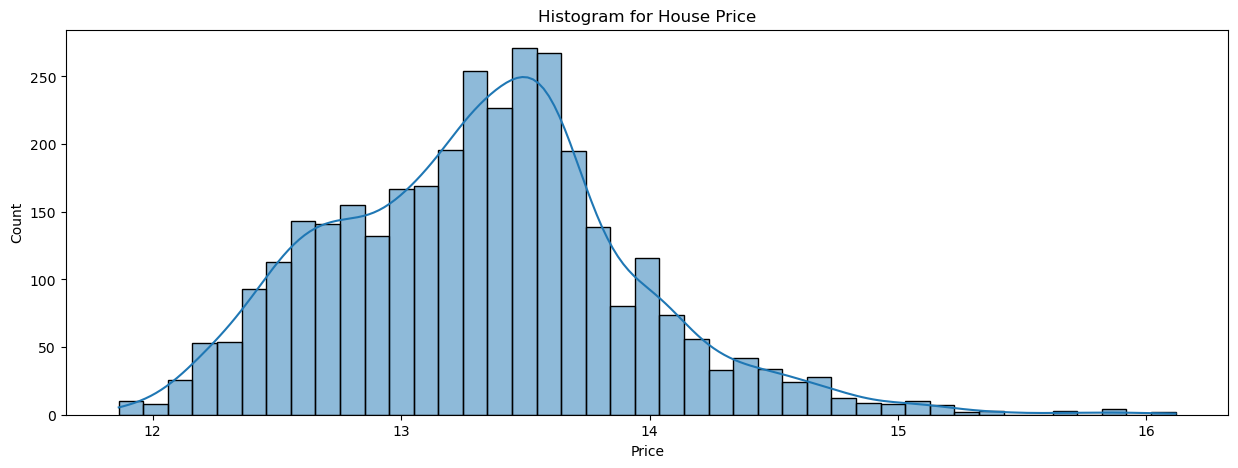

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title("Histogram for House Price")
sns.histplot(np.log(data["Price"]), kde=True, ax=ax); # np.log to log transform the price to normalize the distribution

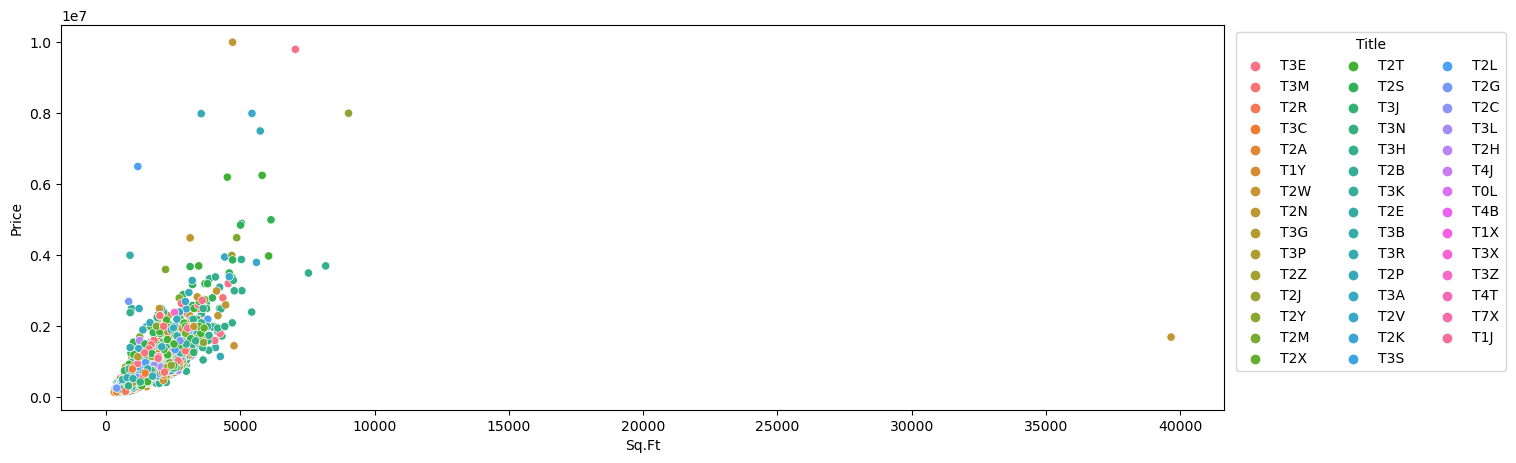

In [22]:
fig, ax = plt.subplots(figsize=(15,5))
sns.scatterplot(data=data, x="Sq.Ft", y="Price", hue="LF1", ax=ax);
ax.legend(loc=(1.01,0.1),ncol=3, title="Title")

In [23]:
# Let look at the super outlier information
data[(data["Sq.Ft"] > 35000)]

,Beds,Bath,Sq.Ft,LF1,Price
1584,4,3.5,39654,T2N,1695000


In [24]:
#  drop the super outlier. We can always go back to include this in the dataset.
data.drop(index=data[(data["Sq.Ft"] > 35000)].index[0], inplace=True)

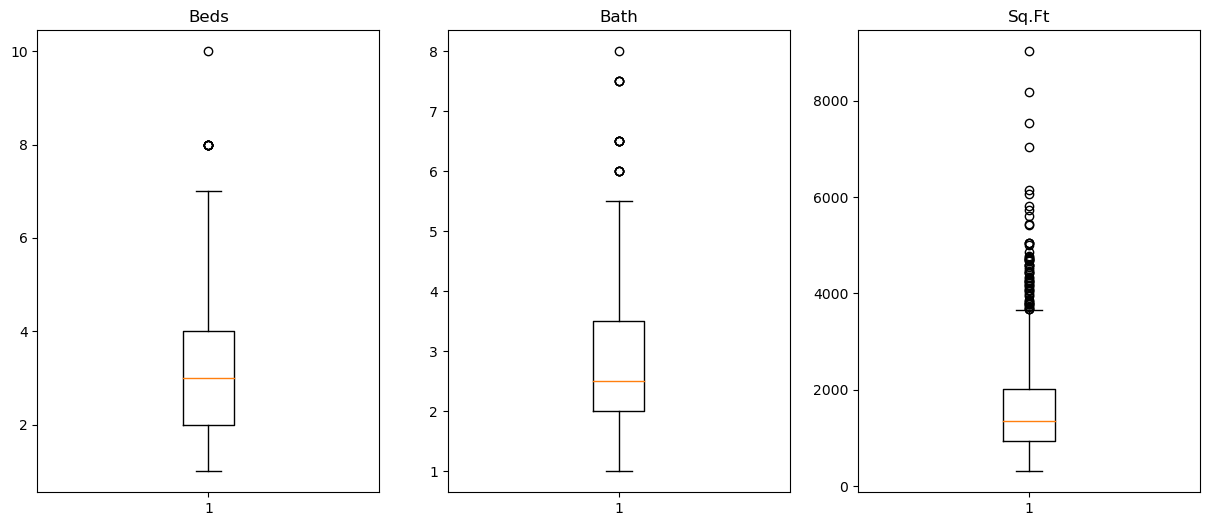

In [25]:
fig, axs = plt.subplots(1,3, figsize=(15,6))

# Create box plots for numerical columns
for i in range(len(data.columns[:3])): # get the first 3 columns
    axs[i].boxplot(data[data.columns[i]])
    axs[i].set_title(data.columns[i])
    
plt.show()

In [29]:
# Count the number of occurrences for each value
beds_count = pd.DataFrame(data['Beds'].value_counts().reset_index())
bath_count = pd.DataFrame(data['Bath'].value_counts().reset_index())

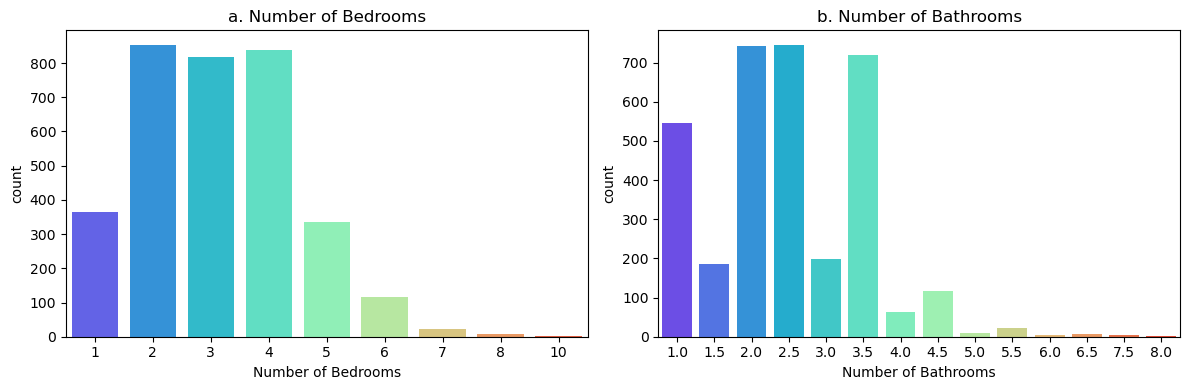

In [30]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Create the first bar plot for the number of bedrooms
sns.barplot(data=beds_count, x='Beds', y='count', palette="rainbow", ax=ax1)
ax1.set_xlabel("Number of Bedrooms")
ax1.set_title("a. Number of Bedrooms")

# Create the second bar plot for the number of bathrooms
sns.barplot(data=bath_count, x='Bath', y='count', palette="rainbow", ax=ax2)
ax2.set_xlabel("Number of Bathrooms")
ax2.set_title("b. Number of Bathrooms")

# Adjust layout
plt.tight_layout()

plt.show()

## Correlation Analysis  
Relationships between the predictors.    
The general relationships between each predictor and the response: 'Price'.  
A correlation matrix

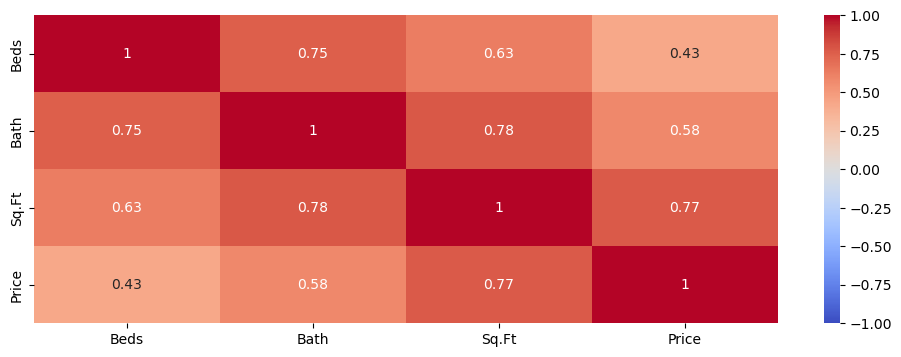

In [26]:
# Get correlation
corrmat = data.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(12,4))
sns.heatmap(corrmat, annot=True, vmin=-1, vmax=1, cmap="coolwarm");

In [31]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LinearRegression

In [33]:
# Let do a train, test split and we shall perform some preparation on the training data for model
from sklearn.model_selection import train_test_split

X = data[["Beds", "Bath", "Sq.Ft", "LF1"]]
y = np.log(data["Price"]) # log transform for the response

# Split the data into train and test data using the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=12345)

In [34]:
# isolate the names of each column for the different transformations
categorical_col = X_train[["LF1"]]
numerical_col = data[["Beds", "Bath", "Sq.Ft"]]

# Get indices of X_train
num_indices = [X_train.columns.get_loc(val) for val in numerical_col]

In [35]:
# Setup the transformer for scaling,
# Be sure to use the column indices instead of column names here!
scaling_transformer_num = make_column_transformer(
    (StandardScaler(),  num_indices),
    remainder = "passthrough"
)

In [36]:
# Setup another categorical transformer for encoding,
# Be sure to use the column indices instead of column names here!
encoding_transformer_cat = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"),  list(range(len(num_indices),len(X_train.columns)))),
    remainder = "passthrough"
)

In [37]:
# Setup the preprocessing pipeline
full_transformer = make_pipeline(
    scaling_transformer_num,
    encoding_transformer_cat,
)

my_pipeline = make_pipeline(
      full_transformer,
      LinearRegression(),
)

In [38]:
# fit X_train
full_transformer.fit(X_train)

Pipeline(steps=[('columntransformer-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  [0, 1, 2])])),
                ('columntransformer-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  [3])]))])

In [40]:
# Function to derive the r-squared for a model passed as an argument
# Make sure to include the transformer steps!

def get_prediction_scores(X_train, X_test, y_train, y_test, model=LinearRegression()): # you can change the model
    
    #Setup a pipeline with the (regression) model
    meta_pipeline = make_pipeline(
        full_transformer,
        model,
    )
    
    meta_pipeline.fit(X_train, y_train)

    y_pred_train_pipe = meta_pipeline.predict(X_train)
    y_pred_test_pipe = meta_pipeline.predict(X_test)

    return {"R Squared Train": r2_score(y_train, y_pred_train_pipe),
            "R Squared Test": r2_score(y_test, y_pred_test_pipe),}

In [41]:
# Check if the function works
get_prediction_scores(X_train, X_test, y_train, y_test, model=LinearRegression())

{'R Squared Train': 0.7837732777495487, 'R Squared Test': 0.7672130570592043}

In [42]:
from sklearn.linear_model import Ridge

get_prediction_scores(X_train, X_test, y_train, y_test, model=Ridge(alpha=0.5))

{'R Squared Train': 0.7836685881432984, 'R Squared Test': 0.7672306022472404}

### Summary  
An accuracy score of 0.7672 for a linear regression model means that it correctly predicted the target variable for approximately 76% of the instances in the dataset used for evaluation.

Here are some points to consider:

Performance: An accuracy of 76% can be considered decent, but the interpretation depends on the context. In some cases, it might be a satisfactory result, while in others, it might need improvement.

Baseline: Understanding the baseline accuracy is essential. If the classes are imbalanced, and a simple model always predicting the majority class could achieve a similar or higher accuracy, then the model might not be providing much information.

Domain Knowledge: Consider the specific requirements of your application or problem domain. Sometimes, achieving a high accuracy is crucial, while in other cases the time vs computing power vs cost are also a strong factor to select the model.

Further Evaluation: Look into other metrics and aspects of model performance, an example is the Ridge.

Cross-validation: If the accuracy score is obtained from a single train-test split, it's a good idea to perform cross-validation to get a more robust estimate of model performance.

In summary, while accuracy is a commonly used metric, it's important to consider the context of your specific problem, potential imbalances in the dataset, and other relevant metrics for a more comprehensive evaluation of your linear regression model